# Linear Regression

Linear regression is a technique that measures the relationship between two variables. If we have an independent variable $X$, and a dependent outcome variable $Y$, linear regression allows us to determine which linear model $Y = \alpha + \beta X$ best explains the data. As an example, let's consider TSLA and SPY. We would like to know how TSLA varies as a function of how SPY varies, so we will take the daily returns of each and regress them against each other.

Python's `statsmodels` library has a built-in linear fit function. Note that this will give a line of best fit; whether or not the relationship it shows is significant is for you to determine. The output will also have some statistics about the model, such as R-squared and the F value, which may help you quantify how good the fit actually is.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     63.14
Date:                Thu, 17 Sep 2015   Prob (F-statistic):           6.66e-14
Time:                        20:55:12   Log-Likelihood:                 548.81
No. Observations:                 251   AIC:                            -1094.
Df Residuals:                     249   BIC:                            -1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0011      0.002      0.626      0.532        -0.002     0.004
x1             1.9271      0.243      7.946      0.000         1.449     2.405
==============================================================================
Omnibus:                       63.947   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.184
Skew:                           0.850   Prob(JB):                     2.50e-81
Kurtosis:                       8.710   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

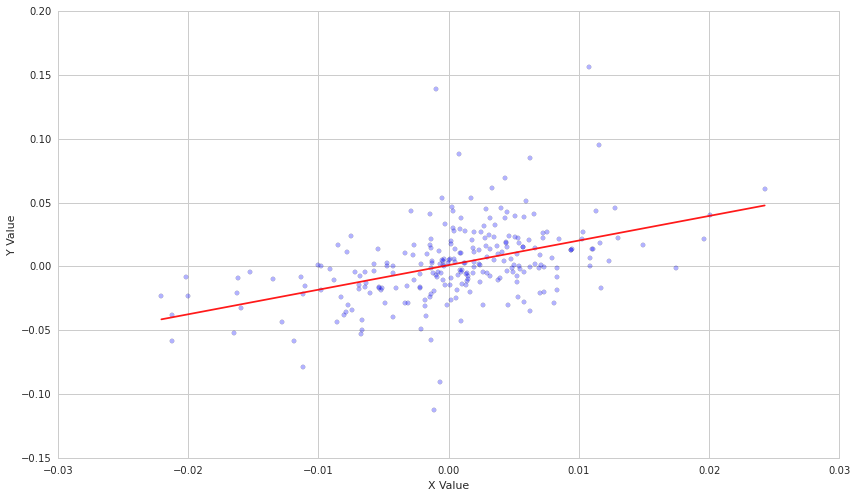

In [3]:
start = '2014-01-01'
end = '2015-01-01'
asset = get_pricing('TSLA', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

linreg(r_b.values, r_a.values)

Each point on the above graph represents a day, with the x-coordinate being the return of SPY, and the y-coordinate being the return of TSLA. As we can see, the line of best fit tells us that for every 1% increased return we see from the SPY, we should see an extra 1.92% from TSLA. This is expressed by the parameter $\beta$, which is 1.9271 as estimated. Of course, for decresed return we will also see about double the loss in TSLA, so we haven't gained anything, we are just more volatile.

##Linear Regression vs. Correlation

* Linear regression gives us a specific linear model, but is limited to cases of linear dependence.
* Correlation is general to linear and non-linear dependencies, but doesn't give us an actual model.
* Both are measures of covariance.
* Linear regression can give us relationship between Y and many independent variables by making X multidimensional.

##Knowing Parameters vs. Estimates

It is very important to keep in mind that all $\alpha$ and $\beta$ parameters estimated by linear regression are just that - estimates. You can never know the underlying true parameters unless you know the physical process producing the data. The paremeters you estimate today may not be the same as the same analysis done including tomorrow's data, and the underlying true parameters may be moving. As such it is very important when doing actual analysis to pay attention to the standard error of the parameter estimates. More material on the standard error will be presented in a later lecture. One way to get a sense of how stable your paremeter estimates are is to estimates them using a rolling window of data and see how much variance there is in the estimates.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     261.2
Date:                Thu, 17 Sep 2015   Prob (F-statistic):           2.14e-29
Time:                        20:55:13   Log-Likelihood:                 27.312
No. Observations:                 100   AIC:                            -50.62
Df Residuals:                      98   BIC:                            -45.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0081      0.038      0.213      0.832        -0.067     0.084
x1             1.0405      0.064     16.162      0.000         0.913     1.168
==============================================================================
Omnibus:                        2.687   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.341
Skew:                          -0.138   Prob(JB):                        0.310
Kurtosis:                       3.697   Cond. No.                         4.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

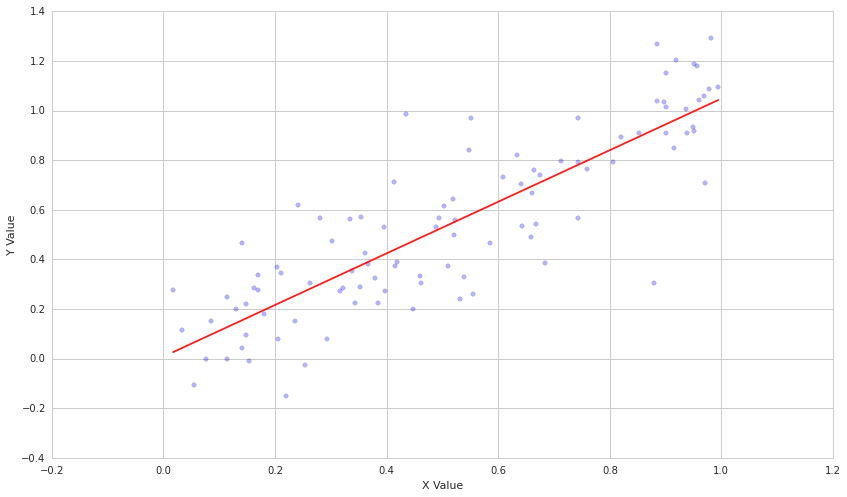

In a situation like the above, the line of best fit does indeed model the dependent variable Y quite well (with a high $R^2$ value).

# Evaluating and reporting results

The regression model relies on several assumptions:
* The independent variable is not random.
* The variance of the error term is constant across observations. This is important for evaluating the goodness of the fit.
* The errors are not autocorrelated. The Durbin-Watson statistic detects this; if it is close to 2, there is no autocorrelation.
* The errors are normally distributed. If this does not hold, we cannot use some of the statistics, such as the F-test.

If we confirm that the necessary assumptions of the regression model are satisfied, we can safely use the statistics reported to analyze the fit. For example, the $R^2$ value tells us the fraction of the total variation of $Y$ that is explained by the model.


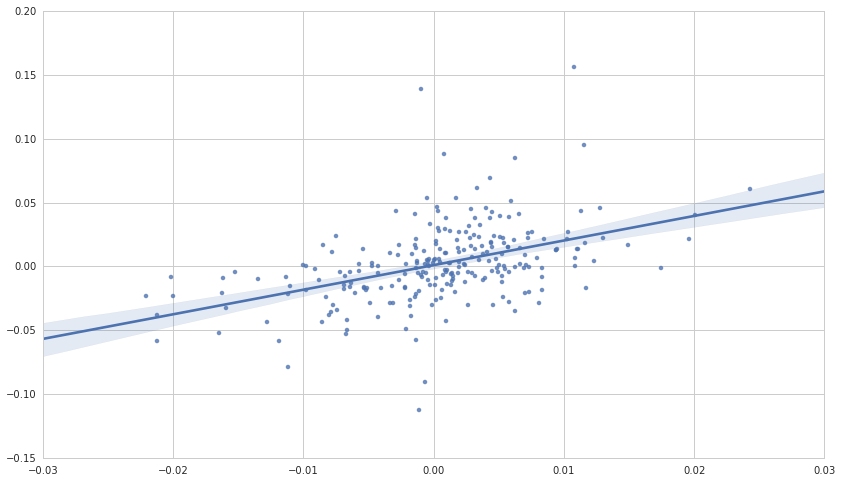

In [6]:
import seaborn

start = '2014-01-01'
end = '2015-01-01'
asset = get_pricing('TSLA', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

seaborn.regplot(r_b.values, r_a.values);

## Mathematical Background

This is a very brief overview of linear regression. For more, please see:
https://en.wikipedia.org/wiki/Linear_regression

##Ordinary Least Squares

Regression works by optimizing the placement of the line of best fit (or plane in higher dimensions). It does so by defining how bad the fit is using an objective function. In ordinary least squares regression (OLS), what we use here, the objective function is:

$$\sum_{i=1}^n (Y_i - a - bX_i)^2$$

We use $a$ and $b$ to represent the potential candidates for $\alpha$ and $\beta$. What this objective function means is that for each point on the line of best fit we compare it with the real point and take the square of the difference. This function will decrease as we get better parameter estimates. Regression is a simple case of numerical optimization that has a closed form solution and does not need any optimizer. We just find the results that minimize the objective function.

We will denote the eventual model that results from minimizing our objective function as:

$$ \hat{Y} = \hat{\alpha} + \hat{\beta}X $$

With $\hat{\alpha}$ and $\hat{\beta}$ being the chosen estimates for the parameters that we use for prediction and $\hat{Y}$ being the predicted values of $Y$ given the estimates.

# Breakpoint using regression!

The following are my outputs for breakpoint detection using regression lines and standard deviation of the stock data.

Length =  252 Steps =  25
slopes =  -13.5080262695 21.7191421175   abs =  35.227168387
slopes =  -15.181397967 25.7303113046   abs =  40.9117092716
slopes =  25.7303113046 -8.28055803254   abs =  34.0108693372
slopes =  10.9947166771 -21.0936987384   abs =  32.0884154155
slopes =  -21.0936987384 18.3465136587   abs =  39.4402123971
mean =  103.595230159 
std =  8.01807804095


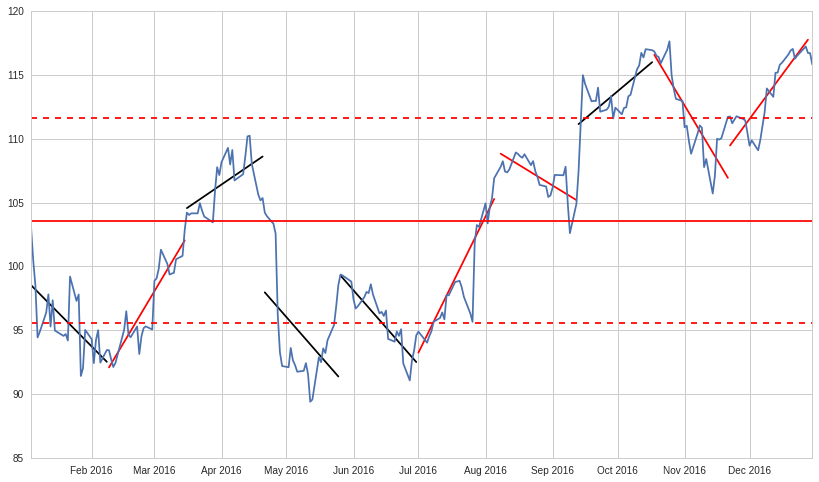

In [34]:
start = '2016-01-01'
end = '2017-0-01'
freq = 'daily'
parts = 10
slopeDiff = 30 #degrees

asset = get_pricing('AAPL', start_date=start, end_date=end, frequency='daily', fields='price')
l = len(asset)
step = int(l/parts)
nums = np.arange(0,step)
dates = asset.index
print 'Length = ', l, 'Steps = ', step

slopes =[]
intercepts = []

for i in range(0, parts*step, step):  
    color = 'black'
    price = asset.values[i:i+step]
    slope, intercept, _ , _ , _  = linregress(nums, price)
    slopes += [math.degrees(math.atan(slope))]
    intercepts += [intercept]
    x1_x2 = [dates[i], dates[i+step-1]]
    y1_y2 = [intercept, intercept + slope*step]    
    
    if i>0 and  abs(slopes[-2] - slopes[-1]) > slopeDiff :
        print 'slopes = ', slopes[-2], slopes[-1],'  abs = ',abs(slopes[-2] - slopes[-1])
        color = 'red'
        
    flag=1
    plt.plot(x1_x2, y1_y2 , color )
    #print 'slope = ', slope, 'intercept = ',intercept

    
plt.plot(asset)
mean = np.mean(asset)
std = np.std(asset)
print 'mean = ',mean,'\nstd = ',std

plt.axhline(y=mean, color='r', linestyle='-')
plt.axhline(y=mean+std, color='r', linestyle='--')
plt.axhline(y=mean-std, color='r', linestyle='--')

Length =  504 	Steps =  50
mean =  49.7284027778 
std =  6.45878748376

i =  0 	slope =  -4.57183809702 	intercept =  43.6727035294

i =  50 	slope =  9.68277456294 	intercept =  38.4014188235
slopes =  -4.57183809702     9.68277456294 	SlopeDiff =  -423.769356708

i =  100 	slope =  -0.021366578779 	intercept =  44.1406564706
slopes =  9.68277456294     -0.021366578779 	SlopeDiff =  14.3432487933
Breakpoint!

i =  150 	slope =  1.29558269017 	intercept =  42.7549670588
slopes =  -0.021366578779     1.29558269017 	SlopeDiff =  192.719923985
Breakpoint!

i =  200 	slope =  6.28412431565 	intercept =  49.6496658824
slopes =  1.29558269017     6.28412431565 	SlopeDiff =  -176.433168532

i =  250 	slope =  -1.4745488967 	intercept =  51.4817247059
slopes =  6.28412431565     -1.4745488967 	SlopeDiff =  523.023175371
Breakpoint!

i =  300 	slope =  -5.75362455554 	intercept =  54.4304258824
slopes =  -1.4745488967     -5.75362455554 	SlopeDiff =  108.076009077

i =  350 	slope =  6.23710377

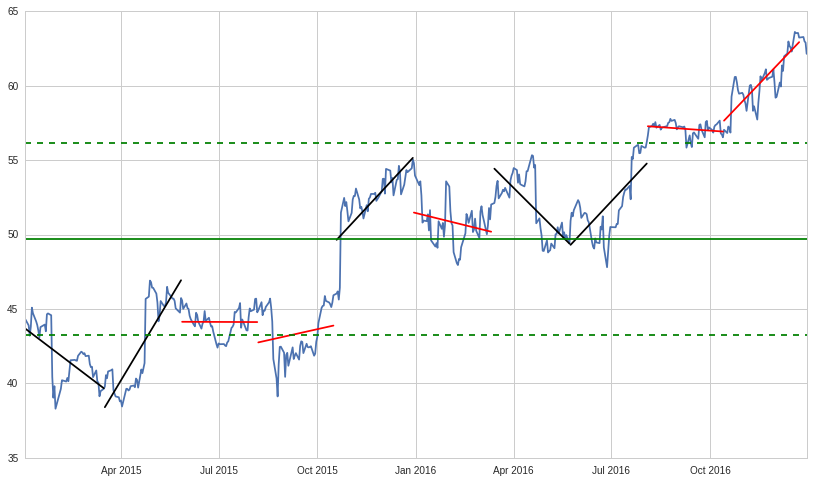

In [58]:
start = '2015-01-01'
end = '2017-01-01'
freq = 'daily'
parts = 10

asset = get_pricing('MSFT', start_date=start, end_date=end, frequency='daily', fields='price')
l = len(asset)
step = l//parts
nums = np.arange(0,step)
dates = asset.index
print 'Length = ', l, '\tSteps = ', step
plt.plot(asset)
mean = np.mean(asset)
std = np.std(asset)
print 'mean = ',mean,'\nstd = ',std

slopes =[]
intercepts = []

for i in range(0, parts*step , step):  
    color = 'black'
    price = asset.values[i:i+step]
    slope, intercept, _ , _ , _  = linregress(nums, price)
    slopes += [math.degrees(math.atan(slope))]
    #intercepts += [intercept]
    print '\ni = ', i, '\tslope = ',slopes[-1], '\tintercept = ', intercept
    x1_x2 = [dates[i], dates[i+step-1]]
    y1_y2 = [intercept, intercept + slope*step]        

    if i>0:
        slopeDiff = math.tan(abs(slopes[-2] - slopes[-1]))*step
        print 'slopes = ', slopes[-2],'   ', slopes[-1], '\tSlopeDiff = ', slopeDiff
        if slopeDiff > std and slopes[-2]*slopes[-1]<0 :
            print 'Breakpoint!'
            color = 'red'            
    
    plt.plot(x1_x2, y1_y2 , color )
    
plt.axhline(y=mean, color='green', linestyle='-')
plt.axhline(y=mean+std, color='green', linestyle='--')
plt.axhline(y=mean-std, color='green', linestyle='--')